In [26]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import pickle 

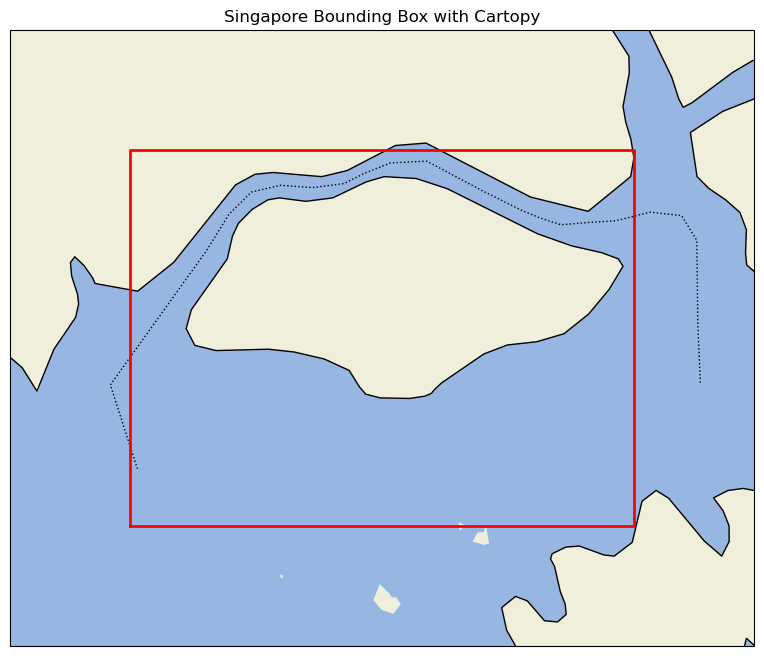

In [27]:
sw = (103.5940, 1.1586)  # (lon, lat)
ne = (104.0125, 1.4705)   # (lon, lat)

import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot bounding box
ax.plot(
    [sw[0], ne[0], ne[0], sw[0], sw[0]],
    [sw[1], sw[1], ne[1], ne[1], sw[1]],
    color='red',
    linewidth=2,
    transform=ccrs.PlateCarree()
)

ax.set_extent([sw[0]-0.1, ne[0]+0.1, sw[1]-0.1, ne[1]+0.1])
plt.title('Singapore Bounding Box with Cartopy')
plt.show()

In [28]:
sw = (103.5940, 1.1586)  # (lon, lat)
ne = (104.0125, 1.4705)   # (lon, lat)
bbox (tuple[1.1586, float, float, float]) – Bounding box as (left, bottom, right, top). 

SyntaxError: invalid character '–' (U+2013) (4103824833.py, line 3)

# Do not run unless you wanna regenerate the graph

In [ ]:
# %%script false
# # download/model a street network for some city then visualize it
# # address = "Woodlands, Northwest, Singapore"
# # dist = 10000 #m
# # dist_type='bbox'
# sw = (103.5940, 1.1586)  # (lon, lat)
# ne = (104.0125, 1.4705)   # (lon, lat)

# # Convert to (left, bottom, right, top)
# bbox = (sw[0], sw[1], ne[0], ne[1])
# # Result: (103.5940, 1.1586, 104.0125, 1.4705)

# G = ox.graph.graph_from_bbox(bbox, network_type='all')
# fig, ax = ox.plot.plot_graph(G)
# # Sve to pickle
# graph_path = "data/SG_nodes.pkl"

# with open(graph_path, 'wb') as f:
#     pickle.dump(G, f)


In [ ]:
graph_path = "data/SG_nodes.pkl"

# Load graph
with open(graph_path, 'rb') as f:  # notice the r instead of w
    G_loaded = pickle.load(f)

In [ ]:
fig, ax = ox.plot.plot_graph(G_loaded)

In [ ]:
# get a fully bidirection network (as a MultiDiGraph)
ox.settings.bidirectional_network_types += "drive"
# G = ox.graph.graph_from_address(address, dist)

# convert your MultiDiGraph to an undirected MultiGraph
M = ox.convert.to_undirected(G_loaded)

# convert your MultiDiGraph to a DiGraph without parallel edges
D = ox.convert.to_digraph(G_loaded)



In [ ]:
locations_df = pd.read_csv('data/locations.csv')


In [ ]:
# # convert graph to line graph so edges become nodes and vice versa
# edge_centrality = nx.closeness_centrality(nx.line_graph(G))
# nx.set_edge_attributes(G, edge_centrality, "edge_centrality")


# # color edges in original graph with closeness centralities from line graph
# ec = ox.plot.get_edge_colors_by_attr(G, "edge_centrality", cmap="inferno")
# fig, ax = ox.plot.plot_graph(G, edge_color=ec, edge_linewidth=2, node_size=0)



# Routing

In [ ]:
# impute missing edge speeds and calculate edge travel times with the speed module
G = ox.routing.add_edge_speeds(G_loaded)
G = ox.routing.add_edge_travel_times(G_loaded)

In [83]:
orchard_rd = (1.30192, 103.83812)
nus_high = (1.30682, 103.77001)
causeway_point = (1.43608, 103.78601)

# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(G, X=orchard_rd[1], Y=orchard_rd[0])
dest = ox.distance.nearest_nodes(G, X=nus_high[1], Y=nus_high[0])


# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.routing.shortest_path(G, orig, dest, weight="travel_time")
# fig, ax = ox.plot.plot_graph_route(G, route, node_size=0)

In [57]:
# My locations

my_locations = pd.read_csv("data/locations.csv")
my_locations.head()

,id,location_name,location_type,lat,lon
0,school_1,Admiralty Primary School,school,1.44294,103.80035
1,school_2,Jurong West Primary School,school,1.33931,103.69903
2,school_3,River Valley Primary School,school,1.29430,103.83593
3,school_4,Casuarina Primary School,school,1.37281,103.95723
4,school_5,St. Joseph’s Institution Junior,school,1.31751,103.84632


In [60]:
location_nodes = [ox.distance.nearest_nodes(G, X=row['lon'], Y=row['lat']) for i, row in my_locations.iterrows()]

In [102]:
my_locations['node_id'] = location_nodes
my_locations.head()

,id,location_name,location_type,lat,lon,node_id
0,school_1,Admiralty Primary School,school,1.44294,103.80035,8655379195
1,school_2,Jurong West Primary School,school,1.33931,103.69903,7437327501
2,school_3,River Valley Primary School,school,1.29430,103.83593,11938018645
3,school_4,Casuarina Primary School,school,1.37281,103.95723,8302208139
4,school_5,St. Joseph’s Institution Junior,school,1.31751,103.84632,10979316519


In [ ]:
location_nodes

[8655379195,
 7437327501,
 11938018645,
 8302208139,
 10979316519,
 8157277817,
 5251084191,
 380363672,
 10844240865,
 2391178715,
 10635333394,
 7678689373,
 4699936575,
 8382845790,
 1868203037,
 5864347640,
 1840076347,
 6691743193,
 6895515722,
 1448550758,
 7673330135,
 2670880553,
 6295747528,
 6038847386,
 1218572701,
 5829758099,
 7010317283,
 1763836304,
 8424241058,
 12376393422,
 6046105577]

In [76]:
len(G.edges())

553996

In [103]:
def get_pairwise_distance_matrix(location_nodes):
    # Initialise empty matrix
    n = len(location_nodes)
    print(n)
    distance_matrix = np.zeros((n, n))
    distances = []
    routes_list = []
    for i in range(n):
        # Create origin node list
        origin_nodes_list = location_nodes[i:]
        print(origin_nodes_list)
        # Create destination node list
        destination_node = location_nodes[i]
        destination_nodes_list = [destination_node for j in range(len(origin_nodes_list))]
        print(destination_nodes_list)
        routes = ox.routing.shortest_path(G, origin_nodes_list, destination_nodes_list, weight="travel_time")
        # Create a dictionary to store the routes...
        routes_list.append(routes)
        # First entry is always a loop, a node going to itself
        distances.append(0)
        for route in routes[1:]:
            edge_lengths = ox.routing.route_to_gdf(G, route)["length"]
            distance = round(sum(edge_lengths))
            distances.append(distance)

    return distances, routes_list


In [105]:
distances, routes_list = get_pairwise_distance_matrix(location_nodes)

31
[8655379195, 7437327501, 11938018645, 8302208139, 10979316519, 8157277817, 5251084191, 380363672, 10844240865, 2391178715, 10635333394, 7678689373, 4699936575, 8382845790, 1868203037, 5864347640, 1840076347, 6691743193, 6895515722, 1448550758, 7673330135, 2670880553, 6295747528, 6038847386, 1218572701, 5829758099, 7010317283, 1763836304, 8424241058, 12376393422, 6046105577]
[8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195, 8655379195]
[7437327501, 11938018645, 8302208139, 10979316519, 8157277817, 5251084191, 380363672, 10844240865, 2391178715, 10635333394, 7678689373, 4699936575, 8382845790, 1868203037, 5864347640, 1840076347, 6691743193, 6895515722, 1448550758, 7673330135, 267

In [107]:
len(distances)

496

## Pickle all the files you need for future work

* `distances`
* `routes_list`
* `location_nodes`
* the new `locations.csv`

In [110]:
# location.csv with nearest node id
fp = 'data/locations_w_node_id.csv'
my_locations.to_csv(fp, index=False)

In [111]:
import pickle

In [115]:
# distances list
with open('data/distances_list.pkl', 'wb') as fp:
    pickle.dump(distances, fp)

In [116]:
# routes list
with open('data/routes_list.pkl', 'wb') as fp:
    pickle.dump(routes_list, fp)

In [117]:
# location_nodes
with open('data/location_nodes.pkl', 'wb') as fp:
    pickle.dump(location_nodes, fp)

# Demo

In [ ]:
loc1 = (1.44633, 103.78061)
loc2 = (1.43608, 103.78601)

# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(G, X=loc1[1], Y=loc2[0])
dest = ox.distance.nearest_nodes(G, X=loc2[1], Y=loc2[0])


# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.routing.shortest_path(G, orig, dest, weight="travel_time")
fig, ax = ox.plot.plot_graph_route(G, route, node_size=0)




In [ ]:
G.nodes()

In [ ]:
# how long is our route in meters?
edge_lengths = ox.routing.route_to_gdf(G, route)["length"]
round(sum(edge_lengths))


In [ ]:
# download/model a street network for some city then visualize it
G = ox.graph.graph_from_place("Woodlands, Singapore", network_type="all")
fig, ax = ox.plot.plot_graph(G)